# Electronic Computing Device Price Prediction Using Machine Learning
Author: Zhuo Fan Chen(P2100746) | Singapore Polytechnic


## Problem Understanding

Before launch of an electronic computing product ,some specification of the products are usually leaked out or release by vendors.With a price predictor,potential consumers will be able to know its estimate price and make a more informed decision when deciding whether to purchase the product.

Additionally,many computers buyers do not know the market price of the computer of that specification and bought the product from external vendors at an overpriced price.Therefore, a price predictor can allow these buyers to have a rough estimation on the average price of product of similar specifications and decide whether is it worth to make the purchase.


Lastly ,it also allows electronic product manufacture to have a rough estimate of the market price of this type of product.


A price of a computer may depend on many factors.Such factors include:Central unit processor(CPU),RAM size,brand etc.

Machine Learning is defined by Mitchell (1997) as the study of computer algorithms that improve automatically through experience. [1] Machine learning comes to our sight in the recent decades with its ease and high performance. It has the capacity to learn and identify patterns from data and make prediction.[2]

In this investigation,we will attempt to use machine learning and evaluate a regression model that has the highest performance in predicting the price of computers based on the relevant features.


## Problem Statement
How can we make use of machine learning to help potential computer buyers and vendors to evaluate market price/worth of a computer?


## Import Dependencies

In [1]:
!pip install numpy matplotlib pandas seaborn scikit-learn==1.0.2 yellowbrick phik statsmodels pyampute xgboost imblearn missingno tqdm mlxtend category-encoders

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
sns.set()

import phik
# Experimental
from sklearn.experimental import enable_halving_search_cv, enable_hist_gradient_boosting

# Base Classes
from sklearn.base import BaseEstimator, TransformerMixin

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_validate, KFold
from yellowbrick.model_selection import learning_curve
from statsmodels.api import qqplot
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

# Data Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer, PolynomialFeatures, OneHotEncoder, PowerTransformer
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration

# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import LinearSVR

# Hyperparameter Tuning
from sklearn.model_selection import HalvingRandomSearchCV, HalvingGridSearchCV, validation_curve, RandomizedSearchCV


# Feature Selection
from sklearn.feature_selection import SelectFromModel, RFECV, SelectKBest, VarianceThreshold, mutual_info_regression, RFE

/home/chzuofa/.local/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Data Ingestion
We import the factory_data dataset provided by the contributors of this experiment.This dataset consist of of a label named Price ($) and 11 independent features as shown below ..15,320 rows of data are found in this dataset.The size of the dataset is neither too small nor too big.

In [3]:
pcDf=pd.read_csv('./pc_data (regression).csv')
pcDf

,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,1706.40200
15316,15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,4000.10600
15317,15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,616.82600
15318,15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,2042.06600


At first glance,we observed:
- The product ID may not be useful in prediction since the product ID for every product may be different
- There is missing data in some rows
- The naming of some data that supposed to be referring to the same thing are named differently.Example: For the macOS in the operating system feature ,some rows are named Mac OS X while other rows named macOS.
- Some features are containing too much information that should be split
- The data type for some features can be changed

## Data Exploration Analysis (EDA)
Before creating the machine learning model, we will carry out the Exploratory Data Analysis (EDA). The exploratory data analysis was proposed by Tukey (1977).It is an approach of analyzing data to gain further discoveries from data and provide a basis for further data preparation and experiment.



### Data Structure

In [4]:
pcDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15320 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        15320 non-null  int64  
 1   Brand             15320 non-null  object 
 2   Type              15320 non-null  object 
 3   Screen Size       15320 non-null  float64
 4   Screen Specs      15320 non-null  object 
 5   CPU               15320 non-null  object 
 6   RAM               15320 non-null  object 
 7   Hard Disk         15320 non-null  object 
 8   GPU               15320 non-null  object 
 9   Operating System  15320 non-null  object 
 10  Weight            15320 non-null  object 
 11  Price ($)         15320 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


By viewing the basic information of the dataset,we realised 2 problem
 - Some feature's data type is incorrect. (E.g. Features such as weight should be more appropriate in float64 form)
 - There is missing data but not identified by default Pandas.  (E.g. The data type of many features is object which is abnormal but total non-null count is still 15320.)

### Feature Engineering


#### Data Categorization

In [5]:
objectEngineer=['Brand','Type','Screen Specs','CPU','RAM','Hard Disk','GPU','Operating System','Weight']

We attempt to take a look at unique items in each feature before deciding on feature engineering.\
Looking at the diagram below,we observed that

    - Screen specification can be split to resolution and whether it is touchscreen.
    - Memory size can be converted to numerical by removing 'GB' and convert data type
    - We see 4 type of disk in disk type but 38 combinations.Therefore,we can split data into 4 new features named : SSD,Hybird.HDD,Flash Storage'
    - Some operating system can be summaries.ie. Windows 10 S is a family of WIndows 10
    - Weight can be converted to numerical by removing 'kg' and convert data type

In [6]:
# from IPython.core.display_functions import display

for i in objectEngineer:
    print(pd.DataFrame(pd.unique(pcDf[i]),columns=[i]))

        Brand
0       Apple
1          HP
2        Acer
3        Asus
4        Dell
5      Lenovo
6       Chuwi
7         MSI
8   Microsoft
9     Toshiba
10     Huawei
11     Xiaomi
12       Vero
13      Razer
14   Mediacom
15    Samsung
16     Google
17    Fujitsu
18         LG
                 Type
0           Ultrabook
1            Notebook
2             Netbook
3              Gaming
4  2 in 1 Convertible
5         Workstation
                                     Screen Specs
0              IPS Panel Retina Display 2560x1600
1                                        1440x900
2                               Full HD 1920x1080
3              IPS Panel Retina Display 2880x1800
4                                        1366x768
5                     IPS Panel Full HD 1920x1080
6              IPS Panel Retina Display 2304x1440
7       IPS Panel Full HD / Touchscreen 1920x1080
8                 Full HD / Touchscreen 1920x1080
9                Touchscreen / Quad HD+ 3200x1800
10              

First, we attempt to remove all unnecessary wordings such as 'kg' in weight and 'GB' in RAM

In [7]:
pcDf.Weight=pcDf.Weight.replace({'kg':''},regex=True)
pcDf.RAM=pcDf.RAM.replace({'GB':''},regex=True)


Then, we catgories the types of operating system

In [8]:
pcDf['Operating System']=pcDf['Operating System'].replace({'Windows 10 S':'Windows 10','Mac OS X':'macOS'},regex=True)
pcDf

,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3568.93416
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2394.77616
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1531.80000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,6759.76680
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4804.79040
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,1706.40200
15316,15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,4000.10600
15317,15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,616.82600
15318,15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,2042.06600


We also attempt to summaries disk type and categories them according to following type : ['SSD','Flash Storage','HDD','Hybrid']

In [9]:
pcDf['Hard Disk']=pcDf['Hard Disk'].replace('\.0','',regex=True)
pcDf['Hard Disk']=pcDf['Hard Disk'].replace('TB','000',regex=True)
pcDf['Hard Disk']=pcDf['Hard Disk'].replace("GB",'',regex=True)

pcDf['Hard Disk'].to_csv('ddd.csv')
index=pcDf['Hard Disk'].index
testDf=pcDf.copy()
typeDisk=['SSD','Flash Storage','HDD','Hybrid']
diskDf=pd.DataFrame(0, columns=typeDisk, index=index)
for i,k in enumerate(testDf['Hard Disk']):
   flag1=0
   td=k

   for s in typeDisk:
       if s in k:
          test=td.split(' '+s,1)
          if any("+" in n for n in test):
              if not flag1:
                td=td.split('+ ',1)[1]
              flag1=1
          diskDf[s][i]+=int(float(test[0]))
pcDf=pd.concat([pcDf,diskDf],axis=1)


We also split screen specification according to resolution and whether it has touch ability

In [10]:
screenType=pcDf['Screen Specs'].apply(lambda x: pd.Series(['NA',x.rsplit(' ',1)[0]] if ('x' in x.rsplit(' ',1)[0]) else x.rsplit(' ',1)))
touch=pd.DataFrame([0 if (touch ==None) else 1 for touch in screenType[0].str.split(pat='Touchscreen',expand=True)[1]],columns=['Touchscreen'])

resolution=pd.DataFrame(screenType[1]).rename(columns={1:"Resolution"})

pcDf=pd.concat([pcDf,resolution,touch],axis=1)

#### Drop Redundant Features

In [11]:
pcDf=pcDf.drop(['Screen Specs','Hard Disk'],1)

/tmp/ipykernel_3043558/1844799192.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pcDf=pcDf.drop(['Screen Specs','Hard Disk'],1)


We then proceed to convert datatype to the correct ones

In [12]:
pcDf=pcDf.astype({'Product ID':np.int64,'Brand':'U16','Type':'U32','Screen Size':'f8','CPU':'U32','RAM':np.int64,'GPU':'U32','Operating System':'U32','Weight':'f8','Resolution':'U32','Touchscreen':np.int64})

In [13]:
pcDf

,Product ID,Brand,Type,Screen Size,CPU,RAM,GPU,Operating System,Weight,Price ($),SSD,Flash Storage,HDD,Hybrid,Resolution,Touchscreen
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,3568.93416,128,0,0,0,2560x1600,0
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,2394.77616,0,128,0,0,1440x900,0
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,1531.80000,256,0,0,0,1920x1080,0
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,6759.76680,512,0,0,0,2880x1800,0
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,4804.79040,256,0,0,0,2560x1600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,15315,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,1706.40200,128,0,0,0,1920x1080,1
15316,15316,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,4000.10600,512,0,0,0,3200x1800,1
15317,15317,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,616.82600,0,64,0,0,1366x768,0
15318,15318,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,2042.06600,0,0,1000,0,1366x768,0


#### Quantitative Features


In [14]:
quantitativeVariable=['Screen Size','RAM','Weight','SSD','HDD','Flash Storage','Hybrid']

#### Qualitative Features

In [15]:
qualitativeVariable=['Brand','Type','CPU','GPU','Operating System','Resolution']

### Univariate Analysis

#### Descriptive Statistics
From the descriptive statistic for quantitative data ,we observed that

        - The average screen size is around 15 inch.The variance in screen size is not big.
        - The average RAM size for computers is around 8GB .
        - The average weight of computer is 2.04 gb.THe standard derivative is quite low
        - The average disk size was around 283 GB ,933 GB, 76 GB and 959 GB for SSD,HDD ,Flash Storage and Hybrid respectively.

In [16]:

pcDf[quantitativeVariable].mask(pcDf[quantitativeVariable] == 0).describe()


,Screen Size,RAM,Weight,SSD,HDD,Flash Storage,Hybrid
count,15320.000000,15320.000000,15320.000000,9928.000000,6792.000000,860.000000,144.000000
mean,15.016475,8.398433,2.040976,282.908944,933.144876,76.874419,959.000000
std,1.425779,5.104099,0.668048,157.511387,331.440705,99.982853,136.456248
min,10.100000,2.000000,0.690000,8.000000,32.000000,16.000000,508.000000
25%,14.000000,4.000000,1.500000,256.000000,1000.000000,32.000000,1000.000000
50%,15.600000,8.000000,2.040000,256.000000,1000.000000,32.000000,1000.000000
75%,15.600000,8.000000,2.310000,256.000000,1000.000000,64.000000,1000.000000
max,18.400000,64.000000,4.700000,1000.000000,2000.000000,512.000000,1000.000000


From the descriptive statistic for qualitative data ,we observed that

        - Lenovo has the released the most amount of computer in record
        - Most type of computer released are notebook.This can mean that notebook are still the main demand of public
        - There is 118 type of CPU and 110 type of GPU.This implies that One Hot Encoder (OHE) might not be a good choice later
        - Most manufacturer still take Windows 10 as the main operating system of their PC.
        - The most common resolution is still 1920x 1080

In [17]:
pcDf[['Brand','Type','CPU','GPU','Operating System','Resolution']].describe()

,Brand,Type,CPU,GPU,Operating System,Resolution
count,15320,15320,15320,15320,15320,15320
unique,19,6,118,110,7,15
top,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,Windows 10,1920x1080
freq,3532,8544,2240,3320,12752,9908


### Target Label
The price is the target label we want to predict.The distribution of the price of computer is positively skewed.Most PC are around the $1500 to $4000 range

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


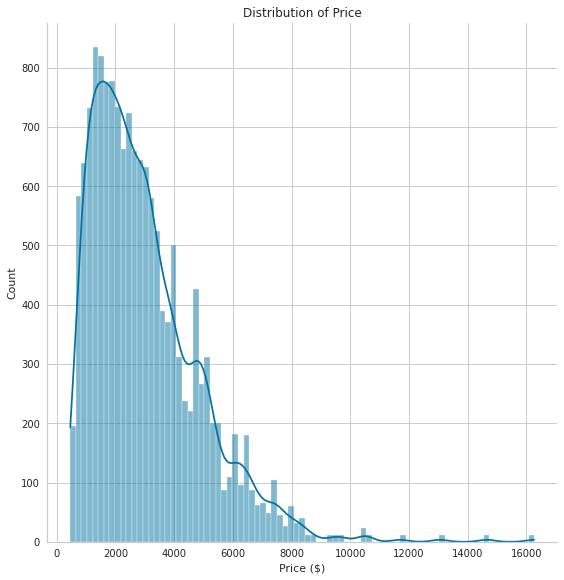

In [18]:
sns.displot(data=pcDf, x="Price ($)", kde=True, height = 8)
plt.title("Distribution of Price")
plt.show()

We see that the medium price is $ 2614.43 and the IQR is $ 2376.64 which is not very far off.

In [19]:
price_median = pcDf["Price ($)"].median()
price_iqr = pcDf["Price ($)"].quantile(.75) - pcDf["Price ($)"].quantile(.25)
print(f"Median Price: ${price_median}, Price IQR: ${price_iqr}")

Median Price: $2614.426, Price IQR: $2376.6440000000002


Upon experimenting,we realised that the target label follows a log normal distribution which can be seen using the figure below.

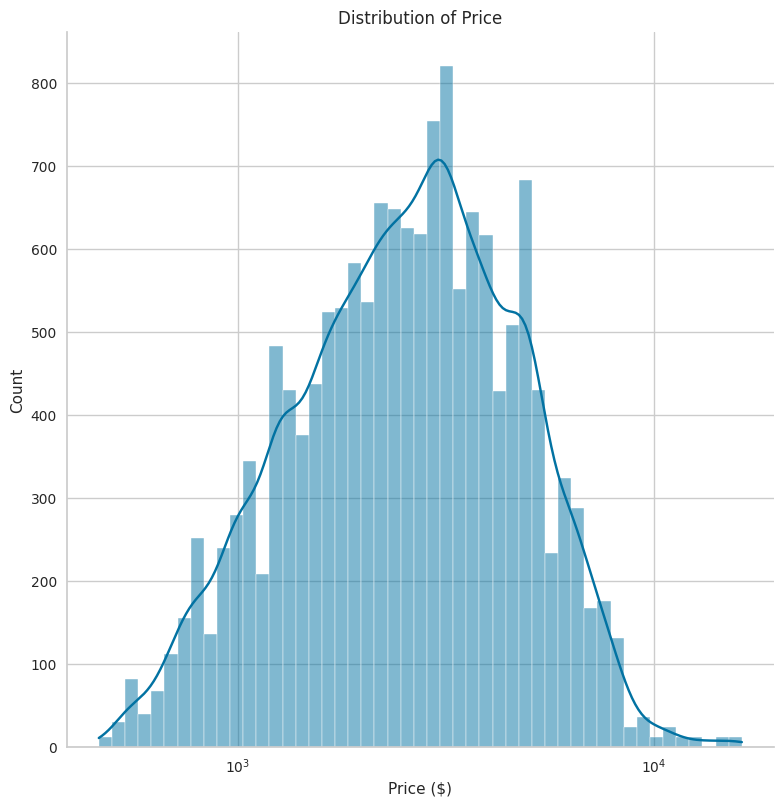

In [20]:
sns.displot(data=pcDf, x="Price ($)", kde=True, height = 8,log_scale=True)
plt.title("Distribution of Price")
plt.show()

From the histogram and the series of bar plot,we observed that:

       - The weight of PC are positively skewed concentrated at 1.0 to 2.5kg.This may means that light weight may be important for laptops
       -  Notebook has the highest share among other type of laptops .This can mean that general used laptop are still the main demand from public .Then followed by gaming laptops and ultrabooks.
       - For brand ,Lenovo and Dell has the most number of laptops released .
       - For GPU , Intel HD Graphic 620 are the most widely used in laptops followed by Intel HD Graphic 520.These GPUs are integrated GPU which comes with CPU.
       - For CPU, the middle class Intel I5 7220U are the most widly used followed by Intel's high class i7 7700HQ.
       - More than 50% of the laptops has a screen size of 15.6 inch
       - Most computer does not use hybrid or flash storage drive.
       - Many PC are still 8GB and 4GB ram.

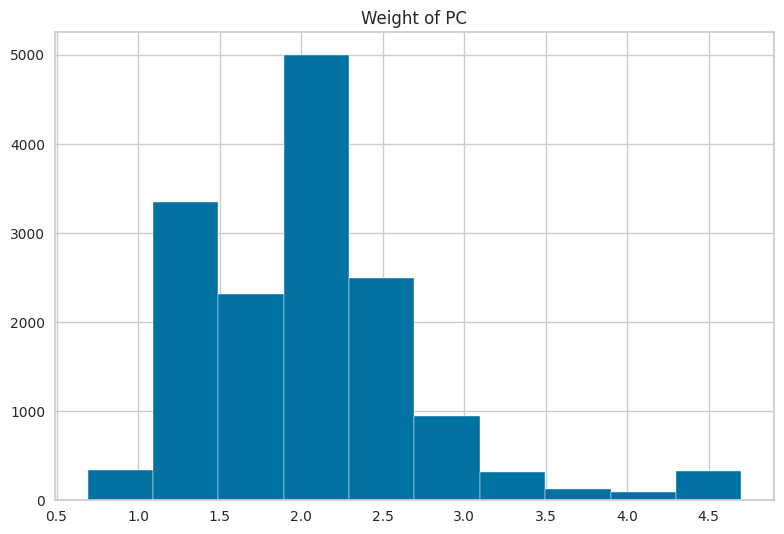

In [21]:
pcDf['Weight'].hist().set_title('Weight of PC')
plt.tight_layout()
plt.show()

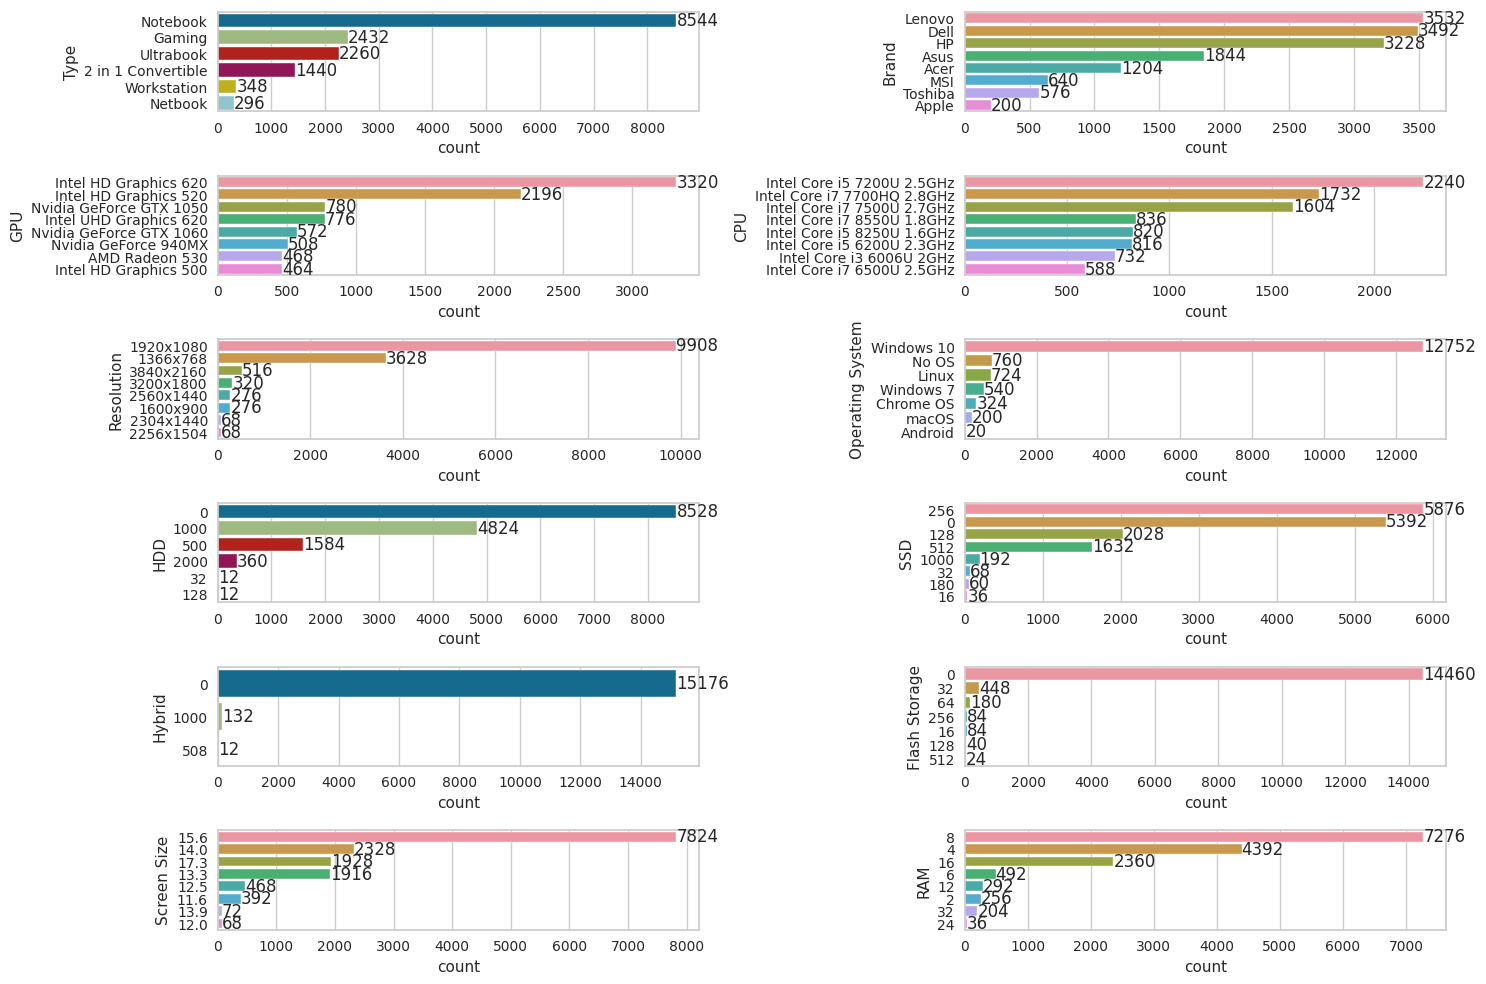

In [22]:
countVariable=qualitativeVariable+['SSD','HDD','Flash Storage','Hybrid','RAM','Screen Size']
fig, ax = plt.subplots(int(np.ceil(len(countVariable)/2)), 2, figsize=(15, 10), tight_layout=True)
for i,y in enumerate(countVariable):
    n=1 if i%2==0 else 0
    g=sns.countplot(y=y,data=pcDf,ax=ax[int(np.floor(i/2)),n],orient='h',order=pcDf[y].value_counts().iloc[:8].index)
    g.bar_label(g.containers[0])
fig.show()

In [23]:
pcDf

,Product ID,Brand,Type,Screen Size,CPU,RAM,GPU,Operating System,Weight,Price ($),SSD,Flash Storage,HDD,Hybrid,Resolution,Touchscreen
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,3568.93416,128,0,0,0,2560x1600,0
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,2394.77616,0,128,0,0,1440x900,0
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,1531.80000,256,0,0,0,1920x1080,0
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,6759.76680,512,0,0,0,2880x1800,0
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,4804.79040,256,0,0,0,2560x1600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,15315,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,1706.40200,128,0,0,0,1920x1080,1
15316,15316,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,4000.10600,512,0,0,0,3200x1800,1
15317,15317,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,616.82600,0,64,0,0,1366x768,0
15318,15318,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,2042.06600,0,0,1000,0,1366x768,0


From the series of box plot below,we observed that there is many outliers in features.This can affect our model badly.However,these outliers are not due to human errors.Dropping it can result in problem when predicting. 

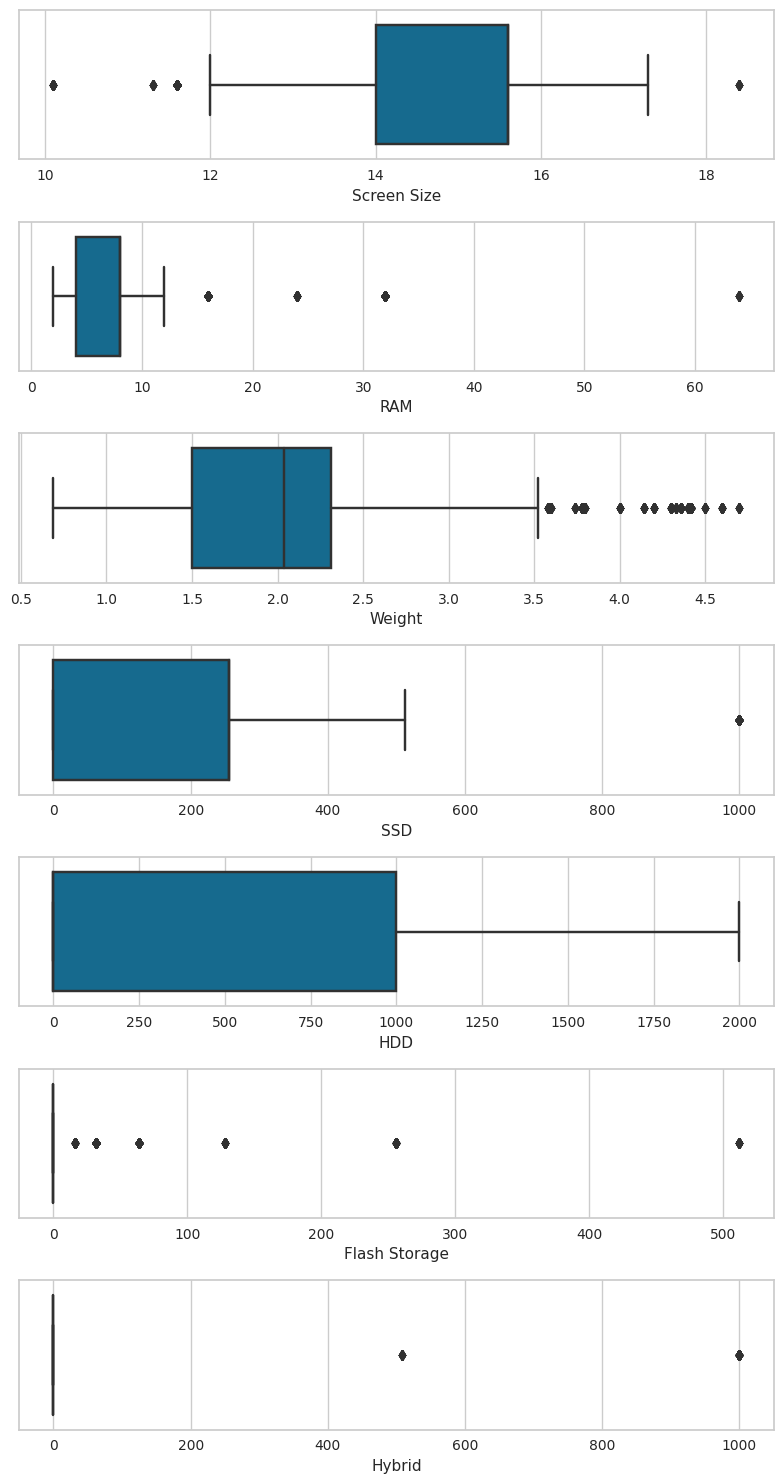

In [28]:
fig, ax = plt.subplots(len(quantitativeVariable), 1, figsize=(8, 15), tight_layout=True)
for idx, feature in enumerate(quantitativeVariable):
    sns.boxplot(data=pcDf, x=feature, ax = ax[idx])
fig.show()

### Bivariate Analysis
All products has different product ID.Therefore, we drop ProductID first since it is unrelated and increases computing workload later.

In [33]:
pcDf=pcDf.drop('Product ID',axis=1)


KeyError: "['Product ID'] not found in axis"

The concept of correlation was first proposed by Francis (1888).Correction is a statistical measure that reflects the extent the variables are linearly linked.[3] It reflects the statistical relationship between variables. Several correlation coefficients are bought up afterward. In this paper, we will the Phik 𝜙k correlation coefficient that is introduced recently by Baak, et al. (2018). The Phik 𝜙k correlation is an extension of Pearson’s hypothesis test. It has the ability to manage categorical, ordinal and interval variables at the same time and captures non-linear dependency which make it useful in doing our research.[4]

From the correlation matrix,we observed that the GPU and CPU are highly correlated with the target label possessing a correlation of 0.91 and 0.88 respectively.This is expected as CPU and GPU are one of the key determinent for the performance of the computer.Therefore ,we will not remove them at current stage.Between features ,we saw that many features are highly correlated with each other such as touchscreen and type which has a high correlation of 0.94.

interval columns not set, guessing: ['Screen Size', 'RAM', 'Weight', 'Price ($)', 'SSD', 'Flash Storage', 'HDD', 'Hybrid', 'Touchscreen']


Text(0.5, 1.0, 'Correlation Matrix')

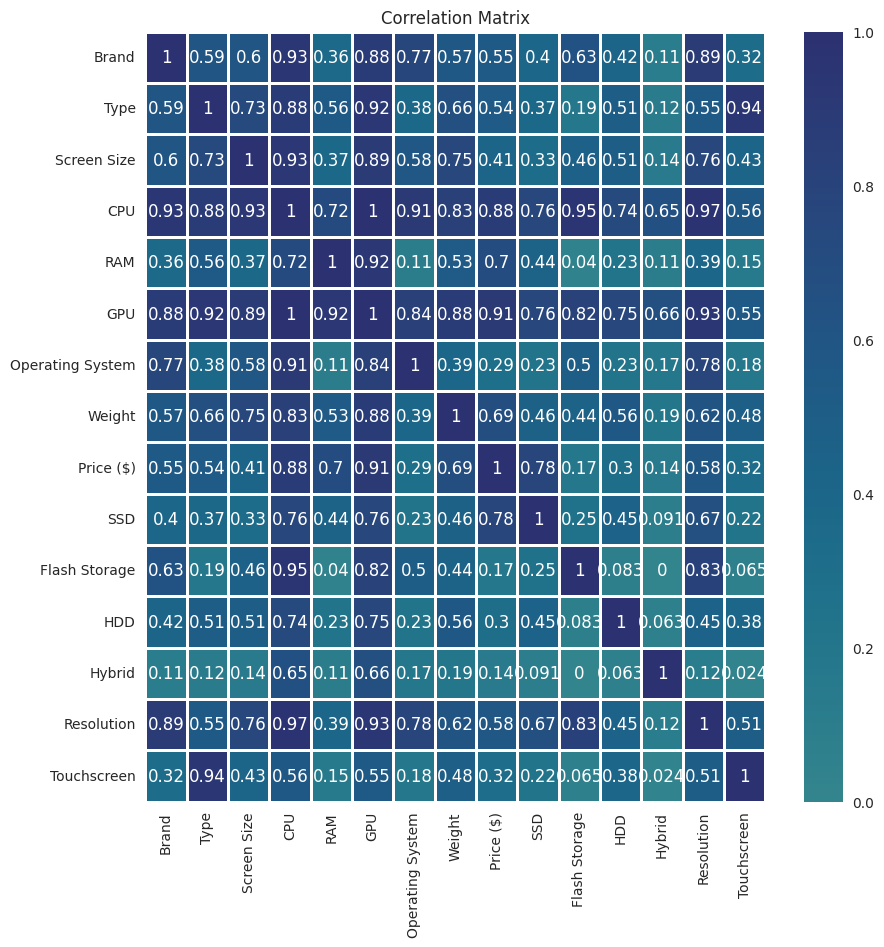

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
# corr_matrix = pcDf.phik_matrix(interval_cols=pcDf.columns)
corr_matrix =pcDf.phik_matrix()
sns.heatmap(corr_matrix, annot = True, linewidths=.8,center = 0,cmap="crest").set_title('Correlation Matrix')

Variance inflation factor(VIF) is a measure of the extent of multicollinearity in a set of regression variables.[5].It can be calculated using

From the table below ,we observed that the operating system and CPU are highly intercorrelated with a VIF of 18.590 and 15.586 respectively

In [35]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [36]:
vifdf=pcDf.copy()
#Label Encoding on the Package attribute
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
#Assigning numerical values and storing in another column
vif=MultiColumnLabelEncoder(columns = qualitativeVariable).fit_transform(vifdf)


vif[quantitativeVariable]=StandardScaler().fit_transform(vif[quantitativeVariable])

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [38]:
calc_vif(vif)

,variables,VIF
0,Brand,3.719288
1,Type,7.846659
2,Screen Size,3.881200
3,CPU,15.586572
4,RAM,3.180541
5,GPU,11.244953
6,Operating System,18.590172
7,Weight,4.795856
8,Price ($),13.222874
9,SSD,3.284781


### Test set and train set
Before any data preprocessing ,we shall first carry out data spliting in the ratio of 8:2 and only work on the train data to avoid data leakage.

In [64]:
x,y=pcDf.drop('Price ($)',axis=1),pcDf['Price ($)']
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

### Feature Selection
Feature selection is the process of reducing the number of redundant and irreverent features/dimensions of dataset and selecting the more relevant features. It is widely used by researchers due to the following reason.

    - Simplices the model for easier interpretation and explanations.
     - Reduce time required in training the model.
     - Reduce the curve of dimensionality mentioned in section 3.4.


We will carry out feature selection using the Sequential Feature Selector(SFS).The SFS is a wrapper method that adds feature to a feature subset in a greedy way.[6]It use cross validation(CV) to select best features according to the scoring metric.The following code determinds the relationship between number of features selected and MAE accuracy.

In [40]:
import pandas as pd

from category_encoders import HashingEncoder
from mlxtend.feature_selection import SequentialFeatureSelector
from category_encoders.one_hot import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.compose import make_column_selector

def featureSelection(X,y,n='all',cv=5):
    class converter():
        def __init__(self):
            super().__init__()

        def fit_transform(self, X, y=None):
            return self.transform(X=X, y=y)

        def transform(self, X, y=None):
            return pd.DataFrame(X)

        def fit(self, X, y=None):
            return self
    def get_pipeline():

        preprocessor = ColumnTransformer(transformers=[
            ('Preprocess Numerical Features', RobustScaler(), make_column_selector(dtype_include='number')),
            ('Hashing Encoding', HashingEncoder(cols=None), make_column_selector(dtype_exclude="number"))
        ], remainder="passthrough")

        clf = Pipeline(steps=[
            ## Column selector requires a dataframe while Column Tranformer returns a np array
            ('df_converter', converter()),
            ('Hashing',preprocessor),
            ('classifier', XGBRegressor(n_jobs=-1))
        ])

        return clf

    if (n=='all'):
        n=len(X.columns)
        print(n)
    record=pd.DataFrame({'score':[],'best':[],'no':[]})
    for i in range(1,n+1):
        print(i)
        sfs=SequentialFeatureSelector(get_pipeline(),
               k_features=i,
               forward=True,
               floating=False,
               scoring='neg_mean_absolute_error',
               cv=cv).fit(X, y)
        record=pd.concat([record,pd.DataFrame({'score':[sfs.k_score_],'best':[sfs.k_feature_names_],'no':[i]})],ignore_index=True)

    return record

In [ ]:
featureEvaluation=featureSelection(x_train,y_train)
featureEvaluation

14
1
2
3
4
5
6
7
9
10
11


<AxesSubplot:xlabel='no', ylabel='score'>

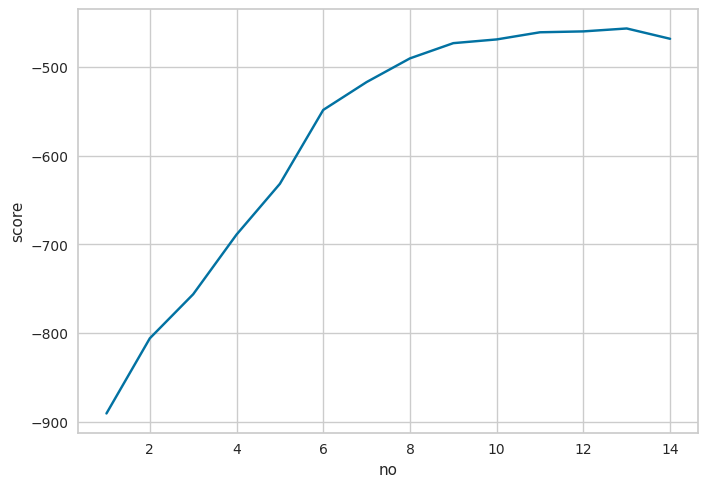

In [43]:
sns.lineplot(x='no',y='score',data=featureEvaluation)

In [ ]:
featureSelected=np.array(featureEvaluation.best[11])

As clearly seen from the graph,selecting these 12 features results in the highest overall performance.Therefore,the 12 features will be used for our modelling later.

In [65]:
featureSelected=['Screen Size','Weight','RAM','Brand','Type','CPU','Operating System','GPU','SSD','Flash Storage','Resolution','HDD']
x_train=x_train[featureSelected]
x_test=x_test[featureSelected]

In [50]:
x_train

,Screen Size,Weight,RAM,Brand,Type,CPU,GPU,SSD,Flash Storage,Resolution,HDD
8217,17.3,2.80,6,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,Nvidia GeForce 940MX,128,0,1600x900,1000
4093,15.6,2.18,4,Dell,Notebook,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,0,0,1920x1080,1000
15182,15.6,2.62,8,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,Nvidia GeForce GTX 1050 Ti,128,0,3840x2160,1000
15014,15.6,2.40,4,Acer,Notebook,Intel Pentium Quad Core N4200 1.1GHz,Intel HD Graphics 505,0,0,1366x768,500
12629,15.6,1.88,8,HP,Ultrabook,Intel Core i7 6500U 2.5GHz,Intel HD Graphics 520,256,0,1920x1080,0
...,...,...,...,...,...,...,...,...,...,...,...
5191,17.3,2.43,16,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,Nvidia GeForce GTX 1070,256,0,1920x1080,2000
13418,15.6,2.20,8,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,Nvidia GeForce 920MX,0,0,1920x1080,1000
5390,17.3,2.90,16,HP,Notebook,Intel Core i7 8550U 1.8GHz,Nvidia GeForce MX150,0,0,1920x1080,1000
860,15.6,2.30,8,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,0,0,1920x1080,1000


### Feature  Scaling
Categorical data are usually encoded with string value. However, most machine learning works better with integer value.[7] Using One Hot Encoder can result in the curve of dimensionility as just by CPU and GPU alone ,it can create up to 200+ new features.However ,using Label Encoder was also not suitable as it can result in categorical variables being rank it a certain order and derive a correlation between the number in the categorical feature and other variable.[8]Therefore, we introduce hashing encoder to encode our features.Hashing Encoders works similar to One Hot Encoder but creates lesser dimension.[9]

In the the previous section ,we also observed that there are many outliers in features.To mitigrate this issue ,we shall use the Robust Scaler.Robust Scaler removes the median and scales the data according to the quantile range which mitigrate the effect of outlier.

In [51]:
import category_encoders
from category_encoders.hashing import HashingEncoder
from sklearn.compose import make_column_selector

quantitativeTransformer=Pipeline([
     ('StandardScaler',RobustScaler())
])
categorical_transformers = Pipeline([
    ('Hashing Encoder', HashingEncoder(max_process=1))
])
data_preprocessing = ColumnTransformer([
    ('Preprocess Numerical Features', quantitativeTransformer, make_column_selector(dtype_include='number')),
       ('Preprocess Categorical Features', categorical_transformers,make_column_selector(dtype_exclude='number'))
])


## Evaluation
In this paper, we will be experimenting 5 models.The model with the highest performance will be selected as the final model.


A baseline classifier will be implemented to determine the bottom line of all models that can be used to compare against other models and further evaluate the performance of model. In this, paper we will be using the Dummy Regressor in scikit-learn.



We are using Mean Absolute Error (MAE) as our primary metric. MAE measures the error between pairs of data.It is the mean absolute value of all prediction errors.The calculation of MAE is given below.




where $y_i$ is the actual data, and $\hat{y}_i$ is the predicted value of $y_i$. $n$ is the total number of instance.
The problem with RMSE and MSE is that they are too sensitive to outliers.The model can be penalised heavily due to this.[10]
Therefore,we select MAE over RMSE and MSE as MAE does not squared the error.Hence,not penalising too heavily especially when dealing with the presence of extreme outliers.

In [52]:
def scoreModel(clf,x,y,algName=None,record=pd.DataFrame({'name':[],'train_neg_mean_absolute_error':[],'test_neg_mean_absolute_error':[],'train_neg_mean_absolute_percentage_error':[],
 'test_neg_mean_absolute_percentage_error':[],
 'train_neg_root_mean_squared_error':[],
 'test_neg_root_mean_squared_error':[]
                                                 })):
    '''
    This function is used for model evaluation . This function use scikit-learn library to carry out cross validation using KFold.

    :param clf: Classifier 分类器
    :param x:Train Data X(Data)  训练数据 （数据）
    :param y:Train Data Y(Result)  训练数据（结果）
    :param algName: Name of Algorithm used for recording 算法名字
    :param record: History record dataframe 在历史记录上叠加结果
    :return:
    This function return 3 variable: 这个函数返回三个参数
    record: Dataframe with current and past record(if there is any)
    current: Dataframe with current record
    lr: Learning curve
    '''
    score=cross_validate(clf,x,y,cv=KFold(n_splits = 5, shuffle = True, random_state = 0,),scoring=["neg_mean_absolute_error", "neg_mean_absolute_percentage_error", "neg_root_mean_squared_error"],n_jobs=-1,return_estimator=True,return_train_score=True)

    current=pd.DataFrame({'name':[algName],'train_neg_mean_absolute_error':score['train_neg_mean_absolute_error'].mean(),'test_neg_mean_absolute_error':score['test_neg_mean_absolute_error'].mean(),'train_neg_mean_absolute_percentage_error':score['train_neg_mean_absolute_percentage_error'].mean(),'test_neg_mean_absolute_percentage_error':score['test_neg_mean_absolute_percentage_error'].mean(),
     'train_neg_root_mean_squared_error':score['train_neg_root_mean_squared_error'].mean(),
         'test_neg_root_mean_squared_error':score['test_neg_root_mean_squared_error'].mean(),
                          })
    record=pd.concat([record,current],ignore_index=True)
    lr = learning_curve(clf, x, y, scoring = 'neg_mean_absolute_error', cv = KFold(n_splits = 5, shuffle = True, random_state = 0,), n_jobs=-1)
    return record,current,lr

### Log Transformation

Previously ,we observed that the distribution of the target label is positively skewed and follows a log normal distribution.Therefore,we will use log transformation in this paper in attempt to improve the model.

In [53]:
def func(x):
     return np.log(x)
def inverse_func(x):
     return np.exp(x)

### Baseline 

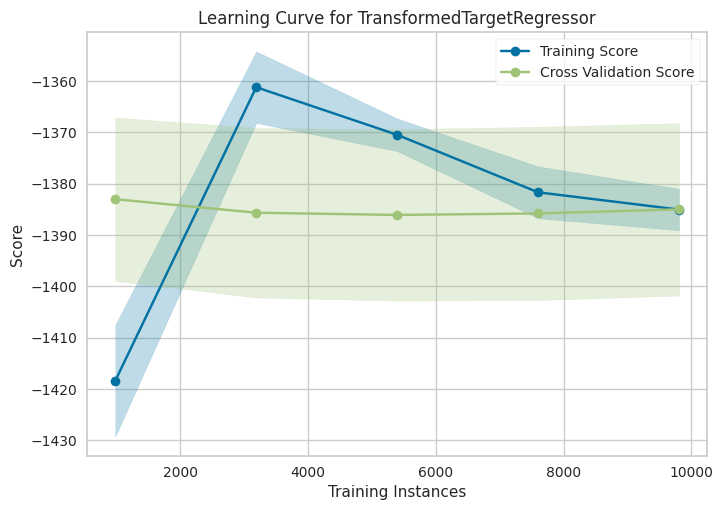

,name,train_neg_mean_absolute_error,test_neg_mean_absolute_error,train_neg_mean_absolute_percentage_error,test_neg_mean_absolute_percentage_error,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error
0,Baseline,-1384.923138,-1384.972964,-0.58425,-0.584298,-1908.213895,-1908.209499


In [55]:
baseline = Pipeline([
    ('Data Preprocessing', data_preprocessing),
    ('Model', TransformedTargetRegressor(regressor=DummyRegressor(),func=func, inverse_func=inverse_func))
])

record, scores, lr = scoreModel(baseline, x_train, y_train, algName="Baseline")
scores

### Extra Tree Regressor

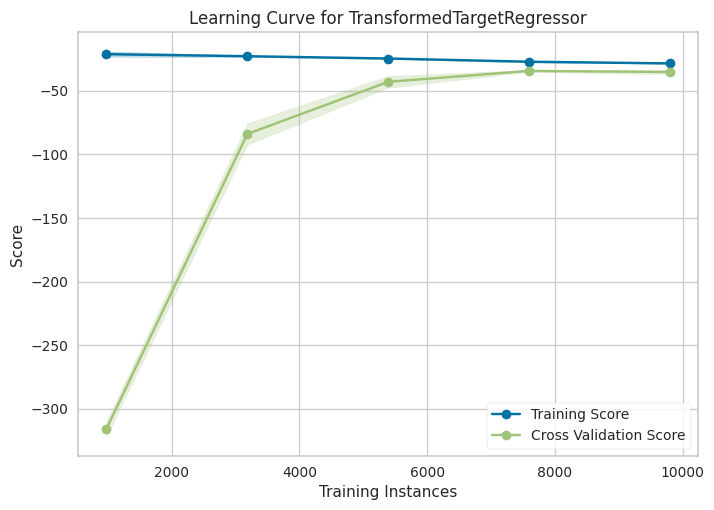

,name,train_neg_mean_absolute_error,test_neg_mean_absolute_error,train_neg_mean_absolute_percentage_error,test_neg_mean_absolute_percentage_error,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error
0,Extra Tree Regressor,-28.439493,-35.194355,-0.01191,-0.01466,-133.296839,-149.260823


In [74]:
ex = Pipeline([
    ('Data Preprocessing', data_preprocessing),
     ('Log',TransformedTargetRegressor(regressor=ExtraTreesRegressor(criterion='absolute_error',n_jobs=-1),func=func, inverse_func=inverse_func)),
])
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV


# parameter={'Model__max_depth':np.arange(2,30),'Model__ccp_alpha':np.arange(0.0027,0.0427,0.002),'Model__n_estimators':np.arange(10,150,10)}
# pd.DataFrame(HalvingGridSearchCV(ex,param_grid=parameter,scoring='neg_mean_absolute_error',n_jobs=-1).fit(x_train,y_train).cv_results_)
record,scores, lr = scoreModel(ex, x_train, y_train, algName="Extra Tree Regressor", record=record)
scores

In [ ]:
parameter={'Log__regressor__max_depth':np.arange(4,15),'Log__regressor__n_estimators':np.arange(10,100,20),'Log__regressor__ccp_alpha':np.arange(0,1,0.1)}
pd.DataFrame(HalvingGridSearchCV(ex,param_grid=parameter,scoring='neg_mean_absolute_error',n_jobs=-1).fit(x_train,y_train).cv_results_)

### Gradient Boosting Tree

In [ ]:
gbm = Pipeline([
    ('Data Preprocessing', data_preprocessing),
    ('Log',TransformedTargetRegressor(regressor=GradientBoostingRegressor(criterion='absolute_error',max_depth=15),func=func, inverse_func=inverse_func)),
])

record,scores, lr = scoreModel(gbm, x_train, y_train, algName="Gradient Boosting Regressor", record=record)
scores

In [ ]:


from sklearn.model_selection import validation_curve
pr=np.arange(5,21,5)
train_score,test_score = validation_curve(gbm,x_train,y_train,n_jobs=-1,param_name='Log__regressor__max_depth',param_range=pr,cv=KFold(n_splits = 5, shuffle = True, random_state = 0,),scoring='neg_mean_absolute_error')
train_score =  np.mean(train_score,axis=1)
test_score = np.mean(test_score,axis=1)
plt.plot(pr,train_score,'o-',color = 'r',label = 'training')
plt.plot(pr,test_score,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('Depth of Tree')
plt.ylabel('Negative Mean Absolute Error')
plt.show()


### Hist Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgbm = Pipeline([
    ('Data Preprocessing', data_preprocessing),
    ('Log',TransformedTargetRegressor(regressor=HistGradientBoostingRegressor(max_depth=17,l2_regularization=0.3),func=func, inverse_func=inverse_func)),
])

record,scores, lr = scoreModel(hgbm, x_train, y_train, algName="HistGradient Boosting Regressor" ,record=record)
scores

In [ ]:
# # explicitly require this experimental feature
# from sklearn.experimental import enable_halving_search_cv # noqa
# # now you can import normally from model_selection
# from sklearn.model_selection import HalvingGridSearchCV
# parameter={'Log__regressor__max_depth':np.arange(7,18),'Log__regressor__l2_regularization':np.arange(0,1,0.1)}
# pd.DataFrame(HalvingGridSearchCV(hgbm,param_grid=parameter,scoring='neg_mean_absolute_error',n_jobs=-1).fit(x_train,y_train).cv_results_)


### Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svr = Pipeline([
    ('Data Preprocessing', data_preprocessing),
    ('Log',TransformedTargetRegressor(regressor=SVR(C=5,gamma=0.2),func=func, inverse_func=inverse_func)),


])



# parameter={'Log__regressor__C':np.arange(2,15)}
# pd.DataFrame(HalvingGridSearchCV(svr,param_grid=parameter,scoring='neg_mean_absolute_error',n_jobs=-1).fit(x_train,y_train).cv_results_)

record,scores, lr = scoreModel(svr, x_train, y_train, algName="Support Vector Regressor", record=record)
scores

In [ ]:
# # explicitly require this experimental feature
# from sklearn.experimental import enable_halving_search_cv # noqa
# # now you can import normally from model_selection
# from sklearn.model_selection import HalvingGridSearchCV
# parameter={'Log__regressor__C':np.arange(1,10),'Log__regressor__gamma':np.arange(0.1,1,0.1)}
# pd.DataFrame(HalvingGridSearchCV(svr,param_grid=parameter,scoring='neg_mean_absolute_error',n_jobs=-1).fit(x_train,y_train).cv_results_)


### eXtreme Boosting Regressor

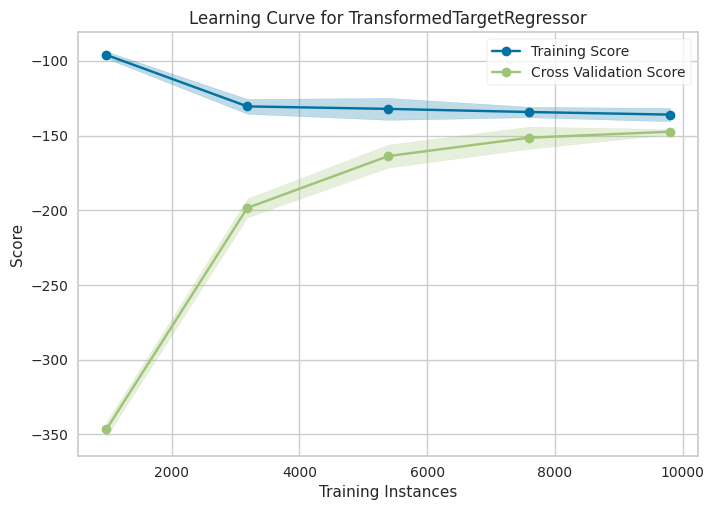

,name,train_neg_mean_absolute_error,test_neg_mean_absolute_error,train_neg_mean_absolute_percentage_error,test_neg_mean_absolute_percentage_error,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error
0,eXtreme Gradient Boosting Regressor,-134.540498,-146.684987,-0.049728,-0.054049,-218.528674,-240.001579


In [77]:
from xgboost import XGBRegressor
xgb = Pipeline([
    ('Data Preprocessing', data_preprocessing),
    ('Log',TransformedTargetRegressor(regressor=XGBRegressor(),func=func, inverse_func=inverse_func)),
])
# parameter={'Log__regressor__max_depth':np.arange(1,15),'Log__regressor__n_estimators':np.arange(0,100,5),'Model__learning_rate':np.arange(0.1,2,0.1)}
# pd.DataFrame(HalvingGridSearchCV(xgb,param_grid=parameter,scoring='neg_mean_absolute_error',n_jobs=-1).fit(x_train,y_train).cv_results_)
record,scores, lr = scoreModel(xgb, x_train, y_train, algName="eXtreme Gradient Boosting Regressor", record=record)
scores

## Result and Discussion
Considering the overall performance and considerations,we will select the Extra Tree Regerssor as our final model.The model has reach a very low MAE of 35.2 and a root mean sqaure error of 149.3.

In [75]:
record

,name,train_neg_mean_absolute_error,test_neg_mean_absolute_error,train_neg_mean_absolute_percentage_error,test_neg_mean_absolute_percentage_error,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error
0,Baseline,-1384.923138,-1384.972964,-0.584250,-0.584298,-1908.213895,-1908.209499
1,Extra Tree Regressor,-36.804865,-45.094949,-0.016095,-0.019589,-150.846940,-167.561529
2,Extra Tree Regressor,-28.439493,-35.194355,-0.011910,-0.014660,-133.296839,-149.260823


## Final Evaluation
In the previous section, we have evaluated that the Extra Tree Regressor model has the highest overall performance. Now, we will be testing the model with the independent test data. The final MAE score,R2 score and the mean squared error(MSE) score obtained from the final evaluation is shown below.


We observed that the final model has a MAE of 36.7 on test data which does not differs much.It reach a R2 score of 99.5%.This means that our model explains 99.5% of the variation in the response variable around its mean. It has a root mean square error of 142.4 which also does not differ much from the result we get from training.Therefore,this suggest that the model generalise well with unseen data.

In [76]:
final = Pipeline([
    ('Data Preprocessing', data_preprocessing),
     ('Log',TransformedTargetRegressor(regressor=ExtraTreesRegressor(criterion='absolute_error',n_jobs=-1),func=func, inverse_func=inverse_func)),
])
final.fit(x_train,y_train)
y_predict=final.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
pd.DataFrame({'Subject':['Extra Tree Regressor'],'Mean Absolute Error':[mean_absolute_error(y_test, y_predict)],'R2 Score':[r2_score(y_test,y_predict)],'Mean Absolute Percentage Error':[mean_absolute_percentage_error(y_test, y_predict)],'Mean Squared Error':[mean_squared_error(y_test, y_predict)]})

,Subject,Mean Absolute Error,R2 Score,Mean Absolute Percentage Error,Mean Squared Error
0,Extra Tree Regressor,36.652816,0.994698,0.015527,20264.215948


[1] Exixon, F.,2018."The Economic Benefits of Globalization for Business and Consumers".Available at https://ecipe.org/wp-content/uploads/2018/01/Globalization-paper-final.pdf. [Last accessed on 20/5/2022]

[2] Apica System,2017."Automated vs Manual Testing: Which Should You Use, and When?".Available at https://www.apica.io/difference-between-automated-manual-testing/. [Last accessed on 20/5/2022]

[3] Stephen, M. S.,1989. “Francis Galton's Account of the Invention of Correlation” Statist. Sci. 4 (2) 73 - 79, May. Available at https://doi.org/10.1214/ss/1177012580 .[Last accessed on 3/5/2022]

[4] Baak, M. et al.,2018.” A new correlation coefficient between categorical, ordinal and interval variables with Pearson characteristics” .Available at https://doi.org/10.48550/arXiv.1811.11440 .[Last accessed on 3/5/2022]

[5] Hair, J. F. Jr., Anderson, R. E., Tatham, R. L. & Black, W. C. (1995). Multivariate Data Analysis (3rd ed). New York: Macmillan.

[6] Raschka, S.,2018."MLxtend: Providing machine learning and data science utilities and extensions to Python's scientific computing stack."J Open Source Softw 3(24).

[7] Seger, C.,2018.” An investigation of categorical
variable encoding techniques in machine learning: binary versus one-hot and feature hashing”. Available at http://www.diva-portal.org/smash/get/diva2:1259073/FULLTEXT01.pdf .[Last accessed on 3/5/2022]

[8] Yadav, D.,2019.” Categorical encoding using Label-Encoding and One-Hot-Encoder”. Available at https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd [Last accessed at 3/5/2022]

[9] Cerda, P.,Varoquaux, G.,2022. "Encoding High-Cardinality String Categorical Variables," in IEEE Transactions on Knowledge and Data Engineering, vol. 34, no. 3, pp. 1164-1176, 1 March 2022, doi: 10.1109/TKDE.2020.2992529.

[10] Chai, T.,Draxler, R. R.,2014."Root mean square error (RMSE) or mean absolute error (MAE)? –
Arguments against avoiding RMSE in the literature".Available at https://doi.org/10.5194/gmd-7-1247-2014
.[Last accessed on 23/5/2022]